# Estadístico de orden k

## Introducción

El estadístico de orden k de un conjunto de n elementos es el el k-ésimo elemento más pequeño. Son casos particulares de estos el máximo (k = n-1), el mínimo (k = 0) y la mediana de un conjunto (k = n/2). Se propone analizar varios algoritmos que computan este valor.

## Análisis de los algoritmos

In [1]:
%matplotlib inline
import timeit
import random
import matplotlib.pyplot as plt

from functools import partial
from brute_force import brute_force, brute_force_1liner

In [2]:
brute_force([4,3,2,1,7,9,2,3,8], 6)

8

In [3]:
brute_force_1liner([4,3,2,1,7,9,2,3,8], 3)

3

In [4]:
K = 3

### Comparación de la ejecución de los algoritmos

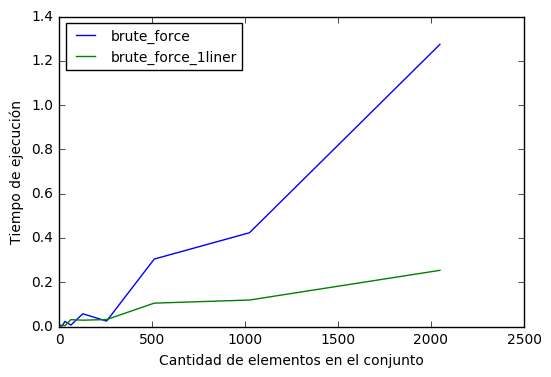

In [10]:
for algorithm in [brute_force, brute_force_1liner]:
    x, y = [], []
    for exp in range(K, 12):
        items = [random.randint(0, K) for _ in range(2**exp)]
        timer = timeit.Timer(partial(algorithm, items, K))
        t = timer.timeit(number=1000)
        y.append(t)
        x.append(2**exp)
    plt.plot(x, y, label=algorithm.__name__)

plt.ylabel('Tiempo de ejecución')
plt.xlabel('Cantidad de elementos en el conjunto')
plt.legend(loc='upper left', prop={'size': 10})
plt.show()